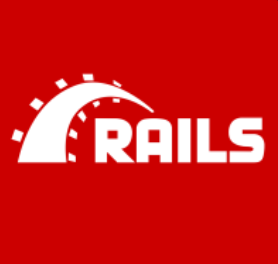

# Rails Software GitHub Issues Analysis      ⬛  Elaborated by: Zaineb El Mabrouk

---



---



>[Rails Software GitHub Issues Analysis      ⬛  Elaborated by: Zaineb El Mabrouk](#scrollTo=jWXW-HhgfMmG&uniqifier=1)

>[Data Description](#scrollTo=qYa4lyxo9OpM&uniqifier=1)

>[EDA & Data Preprocessing](#scrollTo=Mwk0uUWhwfsV&uniqifier=1)

>>>[Some decriptive statistics](#scrollTo=Miw65px_4HGp&uniqifier=1)

>>>[Issues Titles Preprocessing](#scrollTo=4xC2MoIiHqHL&uniqifier=1)

>>>[Date Columns Preprocessing](#scrollTo=2A1ifly45Z4Z&uniqifier=1)

>>>[Correlation Analysis](#scrollTo=o5_werPzDvaV&uniqifier=1)

>>>>[Boxplots](#scrollTo=ciEG1ifOoAS2&uniqifier=1)

>>>>[T-test and Hypothesis Testing](#scrollTo=03z8D16JoKj1&uniqifier=1)

>[ISSUES OVER TIME ANALYSIS](#scrollTo=9O4UCkrWWgLt&uniqifier=1)

>>>[ALL issues over time](#scrollTo=3OAgTpVpWq8J&uniqifier=1)

>>>[Granularity of Open and Closed ISsues Over TIme](#scrollTo=VrRd1eFz3oaB&uniqifier=1)

>>[Analyzing closed issues duration over time](#scrollTo=YxQASGrO6B42&uniqifier=1)

>>>>>[Average Duration](#scrollTo=YwwHazlspd7E&uniqifier=1)

>>>>>[Duration evolution over time](#scrollTo=ip0g8aJIpqzR&uniqifier=1)

>>>>>[Closed issues number evolution over time](#scrollTo=7QOovh6_p0tL&uniqifier=1)

>>[Analyzing the behavior of issues duration regarding the number of created issues each month](#scrollTo=v0pCYv_xXTGT&uniqifier=1)

>[ISSUES PEAK PERIOD AND CAUSES ANALYSIS](#scrollTo=5L7kZpq4hY0r&uniqifier=1)

>>>[Monthly basis](#scrollTo=MrnL8vkAcxKS&uniqifier=1)

>>>[Weekly basis](#scrollTo=sFar0frFc5Qd&uniqifier=1)

>[MAIN CONTRIBUTERS ANALYSIS](#scrollTo=_IllB9vInyKi&uniqifier=1)

>>>[Top issue creators across all analysis period](#scrollTo=Aegxl5HtdRTw&uniqifier=1)

>>>[Closer Look at their Activity throughout the whole period](#scrollTo=uyakamyudhWG&uniqifier=1)

>[LABELS PATTERNS ANALYSIS](#scrollTo=flza-_ghjBqs&uniqifier=1)

>>>[Top 10 issue Label across all analysis period](#scrollTo=tV9O95RcoXIb&uniqifier=1)

>>>[Labels Granularity behavior each month](#scrollTo=D-JTZMoTo2QM&uniqifier=1)

>>>[Uncovering Label dependencies using Association Rules](#scrollTo=APxJXZgzpIqx&uniqifier=1)

>>>>[Trying some minimum support values (5% and 1%) and analysing frequent labels accordingly](#scrollTo=jfP_ADkpG6c2&uniqifier=1)

>>>[Exploring relationships between issues labels and how they relate to each other using parallel category plot with 1% minimum support threshold](#scrollTo=_l53TqIyOC03&uniqifier=1)

>[My question](#scrollTo=HUKYghAYm2V6&uniqifier=1)

>>>[Motivation](#scrollTo=ZPSsK-OORAw4&uniqifier=1)

>>>[Steps to Answer:](#scrollTo=g0ljDWTfnNrU&uniqifier=1)

>>>[Implementation](#scrollTo=zYGAqiy3eKf8&uniqifier=1)

>[Conclusion](#scrollTo=rqI-biQ-bgQI&uniqifier=1)



# Data Description

Data: Rails issues

Source: Github

Extracted using Github REST API

Number of rows: 500

Features with their descriptions:


*   Issue Title: The title of the issue raised by  developers. It briefly describes the problem.
*   Issue Number: A unique identifier assigned to each issuue.
*   State: The current state of the issue, indicating whether it is open, closed
*   Created At: The date when the issue was initially created
*   Updated At: The date when the issue was last updated.
*   Closed At: The date when the issue was closed (if it is currently closed)
*   URL: The  URL to the specific issue to access more details about the issue like the closed_by metric ( can't be further investigted due to API rate limit)
*   Labels: Labels assigned to the issue to categorize it
*   Author: The user or developer who opened the issue.
*   Comments: The number of comments made on the issue.














In [269]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import numpy as np
import ast
from ast import literal_eval
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

import re
from wordcloud import WordCloud
from networkx.algorithms import community
from scipy.stats import ttest_ind
from mlxtend.frequent_patterns import association_rules, apriori




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [272]:

# Ignore the DeprecationWarning from IPython
warnings.filterwarnings("ignore", category=DeprecationWarning, module="ipykernel")
# Ignore the DeprecationWarning from wordcloud
warnings.filterwarnings("ignore", category=DeprecationWarning, module="wordcloud")


In [ ]:
# installing wordcloud
pip install pandas wordcloud matplotlib


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [171]:
! pip install --index-url https://test.pypi.org/simple/ PyARMViz

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://test.pypi.org/simple/


In [273]:
# importing the data extracted from GitHub API
df=pd.read_csv(r'/issues.csv')

In [274]:
df

,Issue Title,Issue Number,State,Created At,Updated At,Closed At,URL,Labels,Author,Comments
0,Rails 7.0.6 cannot update credentials from files,48900,open,2023-08-06T18:59:55Z,2023-08-06T18:59:55Z,NaN,https://github.com/rails/rails/issues/48900,[],m2wasabi,0
1,7.0.6 changed the i18n behavior of validation ...,48884,closed,2023-08-04T10:02:33Z,2023-08-04T22:44:08Z,2023-08-04T19:57:58Z,https://github.com/rails/rails/issues/48884,[],wata727,8
2,Rails hangs on Turbo::StreamsChannel is stream...,48882,open,2023-08-04T09:44:12Z,2023-08-05T21:10:03Z,NaN,https://github.com/rails/rails/issues/48882,['more-information-needed'],cvandermeer,1
3,ActionController::PermissionsPolicy does not d...,48878,open,2023-08-03T21:14:55Z,2023-08-03T21:20:00Z,NaN,https://github.com/rails/rails/issues/48878,"['actionpack', 'attached PR']",mikevoets,1
4,AbstractController::DoubleRenderError: ...,48875,open,2023-08-02T21:45:12Z,2023-08-02T22:08:31Z,NaN,https://github.com/rails/rails/issues/48875,['more-information-needed'],karantomar-aretove,1
...,...,...,...,...,...,...,...,...,...,...
495,is there any possibility that implementing fin...,46686,closed,2022-12-09T16:20:53Z,2022-12-12T17:44:30Z,2022-12-12T17:44:30Z,https://github.com/rails/rails/issues/46686,[],akkt222,4
496,Changes in behaviour with `#dup` and `#concat`,46685,closed,2022-12-09T14:41:43Z,2022-12-10T03:24:24Z,2022-12-09T18:27:29Z,https://github.com/rails/rails/issues/46685,['activerecord'],adrianna-chang-shopify,2
497,Serialized attributes assigned with accepts_ne...,46684,open,2022-12-09T14:36:18Z,2023-02-07T15:40:51Z,NaN,https://github.com/rails/rails/issues/46684,"['activerecord', 'attached PR']",akaspick,1
498,Error during installation,46682,closed,2022-12-09T08:23:05Z,2022-12-13T01:10:18Z,2022-12-13T01:10:18Z,https://github.com/rails/rails/issues/46682,[],DmytroKmetsynskyi,2


# EDA & Data Preprocessing

###Some decriptive statistics

In [275]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
       Issue Number    Comments
count    500.000000  500.000000
mean   47818.744000    3.166000
std      648.218362    3.079189
min    46680.000000    0.000000
25%    47264.750000    1.000000
50%    47859.500000    2.000000
75%    48388.000000    4.000000
max    48900.000000   23.000000


In [276]:
# count of unique values in each column
print(df.nunique())

Issue Title     500
Issue Number    500
State             2
Created At      500
Updated At      500
Closed At       387
URL             500
Labels           78
Author          408
Comments         17
dtype: int64


In [277]:
# checking for missing value
df.isnull().sum()

Issue Title       0
Issue Number      0
State             0
Created At        0
Updated At        0
Closed At       113
URL               0
Labels            0
Author            0
Comments          0
dtype: int64

only closed at column contains null values which eventually means that in our dataset we have 113 issues with status "Open".
these null values won't befilled nor dropped because they carry important information for our analysis.
we are going to convert date columns to datetime objects to work with them ( NAN will become NAT)

### Issues Titles Preprocessing

In [278]:
# Download necessary resources for nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [279]:

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and URLs using regex
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"http\S+", "", text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words]

    # Apply stemming
    stemmer = PorterStemmer()
    preprocessed_text = [stemmer.stem(word) for word in filtered_words]

    # Join the preprocessed words back to text
    preprocessed_text = " ".join(preprocessed_text)

    return preprocessed_text

# Preprocess the Issue Title column
df["Preprocessed Title"] = df["Issue Title"].apply(preprocess_text)

# Display the preprocessed titles
df


,Issue Title,Issue Number,State,Created At,Updated At,Closed At,URL,Labels,Author,Comments,Preprocessed Title
0,Rails 7.0.6 cannot update credentials from files,48900,open,2023-08-06T18:59:55Z,2023-08-06T18:59:55Z,NaN,https://github.com/rails/rails/issues/48900,[],m2wasabi,0,rail updat credenti file
1,7.0.6 changed the i18n behavior of validation ...,48884,closed,2023-08-04T10:02:33Z,2023-08-04T22:44:08Z,2023-08-04T19:57:58Z,https://github.com/rails/rails/issues/48884,[],wata727,8,chang behavior valid messag base autosav associ
2,Rails hangs on Turbo::StreamsChannel is stream...,48882,open,2023-08-04T09:44:12Z,2023-08-05T21:10:03Z,NaN,https://github.com/rails/rails/issues/48882,['more-information-needed'],cvandermeer,1,rail hang turbostreamschannel stream
3,ActionController::PermissionsPolicy does not d...,48878,open,2023-08-03T21:14:55Z,2023-08-03T21:20:00Z,NaN,https://github.com/rails/rails/issues/48878,"['actionpack', 'attached PR']",mikevoets,1,actioncontrollerpermissionspolici defin permis...
4,AbstractController::DoubleRenderError: ...,48875,open,2023-08-02T21:45:12Z,2023-08-02T22:08:31Z,NaN,https://github.com/rails/rails/issues/48875,['more-information-needed'],karantomar-aretove,1,abstractcontrollerdoublerendererror render and...
...,...,...,...,...,...,...,...,...,...,...,...
495,is there any possibility that implementing fin...,46686,closed,2022-12-09T16:20:53Z,2022-12-12T17:44:30Z,2022-12-12T17:44:30Z,https://github.com/rails/rails/issues/46686,[],akkt222,4,possibl implement find method
496,Changes in behaviour with `#dup` and `#concat`,46685,closed,2022-12-09T14:41:43Z,2022-12-10T03:24:24Z,2022-12-09T18:27:29Z,https://github.com/rails/rails/issues/46685,['activerecord'],adrianna-chang-shopify,2,chang behaviour dup concat
497,Serialized attributes assigned with accepts_ne...,46684,open,2022-12-09T14:36:18Z,2023-02-07T15:40:51Z,NaN,https://github.com/rails/rails/issues/46684,"['activerecord', 'attached PR']",akaspick,1,serial attribut assign acceptsnestedattributes...
498,Error during installation,46682,closed,2022-12-09T08:23:05Z,2022-12-13T01:10:18Z,2022-12-13T01:10:18Z,https://github.com/rails/rails/issues/46682,[],DmytroKmetsynskyi,2,error instal


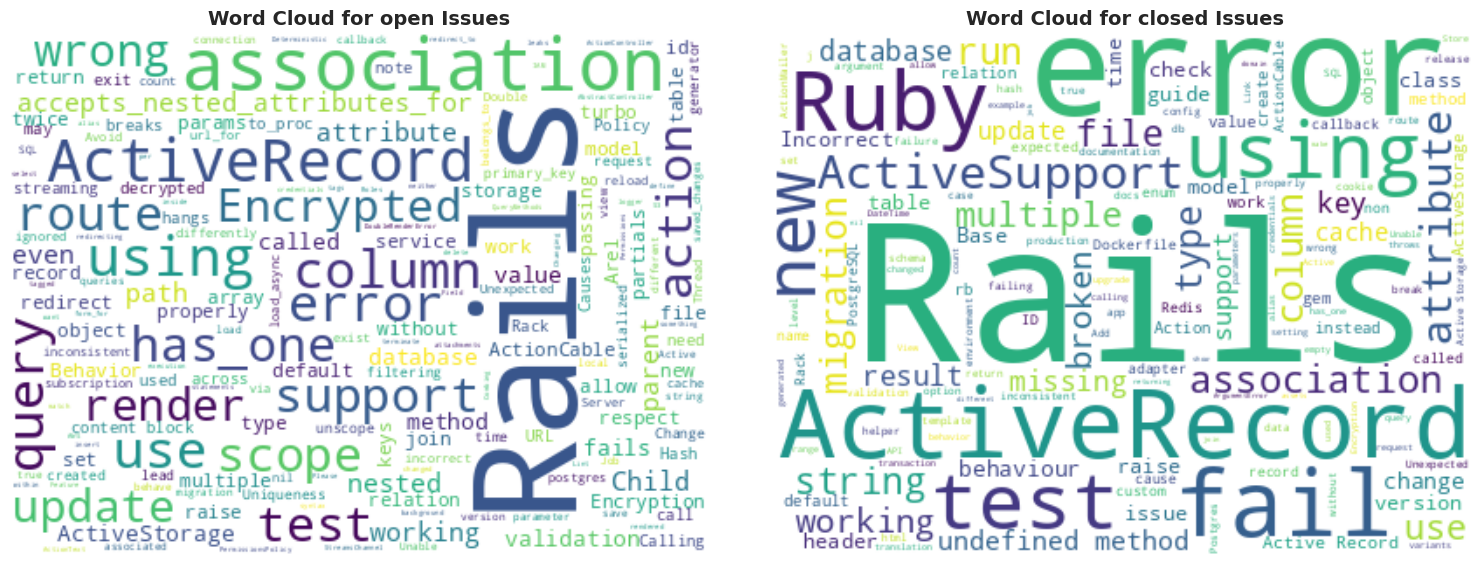

In [280]:
# Create separate subplots for each state (open and closed)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create word clouds for each state (open and closed)
for idx, state in enumerate(df["State"].unique()):
    state_data = df[df["State"] == state]
    all_titles = " ".join(state_data["Issue Title"])

    # Generate the word cloud
    wordcloud = WordCloud(width=400, height=300, background_color="white").generate(all_titles)

    # Display the word cloud in the corresponding subplot
    axes[idx].imshow(wordcloud, interpolation="bilinear")
    axes[idx].set_title(f"Word Cloud for {state} Issues", fontsize=14, fontweight='bold')
    axes[idx].axis("off")

# Add spacing between the two subplots
plt.tight_layout(w_pad=4)

# Show the entire figure s
plt.show()



the frequent occurrences of the issue label : "ActiveRecord" may suggest that issues related to this specific component of the codebase are persistent and need constant attention, leading to them being both opened and eventually closed over time.

"ActiveSupport" issues are o longer present in currently opened issues which suggests that this  functionality that has been fully implemented and closed and problems are resolved


###  Date Columns Preprocessing

In [235]:
# Checking the data type of the date columns
df[{'Created At', 'Updated At', 'Closed At'}].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Created At  500 non-null    object
 1   Closed At   387 non-null    object
 2   Updated At  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-235-c4df633f100e>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [247]:
# converting them to datetime objects since they are of object type
df['Created At'] = pd.to_datetime(df['Created At'])
df['Updated At'] = pd.to_datetime(df['Updated At'])
df['Closed At'] = pd.to_datetime(df['Closed At'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [248]:
# reChecking the data type of the date columns
df[{'Created At', 'Updated At','Closed At'}].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Created At  500 non-null    datetime64[ns, UTC]
 1   Closed At   387 non-null    datetime64[ns, UTC]
 2   Updated At  500 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](3)
memory usage: 11.8 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-248-d7958b7c849d>:2: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.



In [238]:
# Extracting Day of the week from date columns
df['Created At day'] = df['Created At'].dt.day_name()
df['Updated At day'] = df['Updated At'].dt.day_name()
df['Closed At day'] = df['Closed At'].dt.day_name()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Distribution of Issue States:
closed    387
open      113
Name: State, dtype: int64


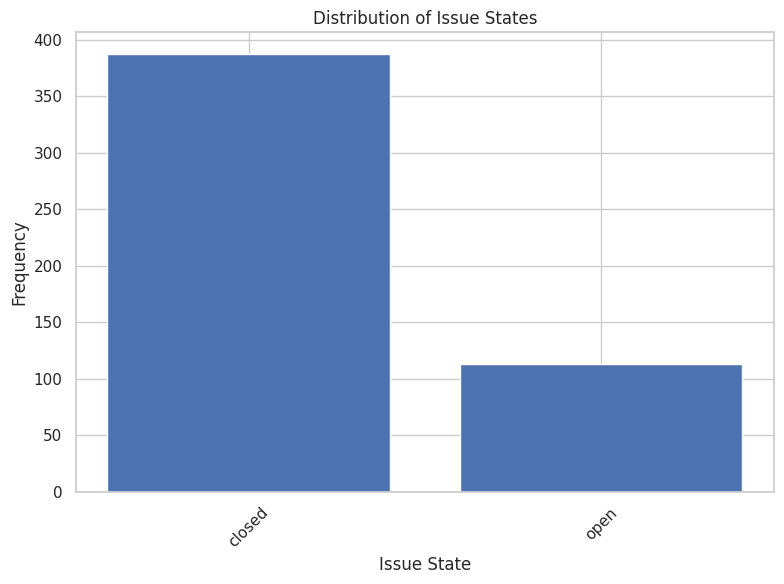

In [239]:

# Examine the distribution of issue states
issue_state_counts = df["State"].value_counts()
print("Distribution of Issue States:")
print(issue_state_counts)

# Plot the distributions
plt.figure(figsize=(8, 6))
plt.bar(issue_state_counts.index, issue_state_counts.values)
plt.xlabel("Issue State")
plt.ylabel("Frequency")
plt.title("Distribution of Issue States")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





the closed issues out number the open issues indicating a contenious effort to solve software problems




### Correlation Analysis

#### Boxplots

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



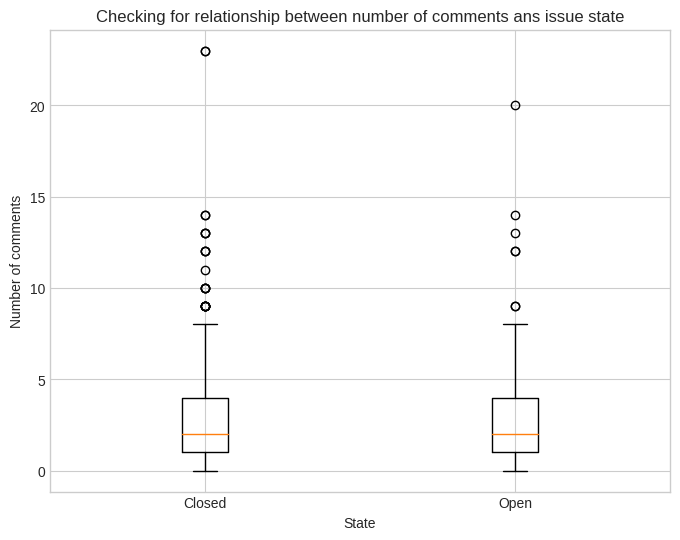

In [187]:
# ##############    Checking for relationship between number of comments ans issue state     ###################################

# Separate the data for closed and open states
closed_comments = df[df['State'] == 'closed']['Comments']
open_comments = df[df['State'] == 'open']['Comments']


plt.figure(figsize=(8, 6))
plt.boxplot([closed_comments,
             open_comments],
            labels=['Closed', 'Open'])
plt.xlabel('State')
plt.ylabel('Number of comments')
plt.title('Checking for relationship between number of comments ans issue state')
plt.show()

#### T-test and Hypothesis Testing

In [188]:

# Perform the t-test
t_stat, p_value = ttest_ind(closed_comments, open_comments)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: -0.11247003546692767
P-Value: 0.9104960471808623


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



the median and the spread of data of the number of comments for open anc closed issues is almost the same which suggests the inexistence of a possible relationship between the number of comments on a specific issue and its state.
Checking further with a ttest:

◾ H0:There is no significant difference in the average number of comments between "closed" and "open" states.

◾ H1: There is a significant difference in the average number of comments between "closed" and "open" states.

▶ as the absolute value of the t statistic is small and also the p value is relatively high, we fail to reject  H0
whcih means that there is no relation between the State of an issue and the number of comments


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Correlation between 'Comments' and 'Issue Duration': 0.22


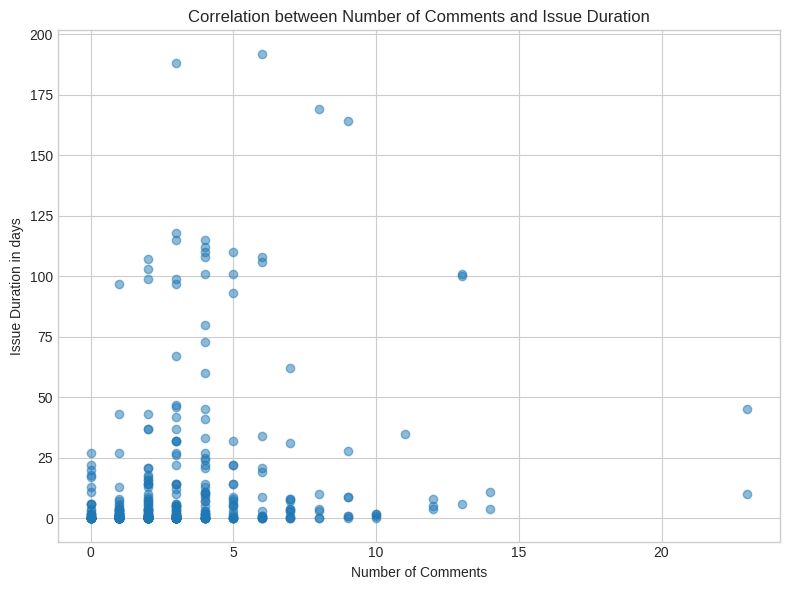

In [190]:
# ##############    Checking for relationship between number of comments ans issue duration before being resolved     ###################################

# Check for correlation between "Comments" and "Issue Duration"
df['duration'] = (df['Closed At'] - df['Created At']).dt.days
duration_of_closed=df[df['State'] == 'closed']['duration']
correlation = df["Comments"].corr(df["duration"])

print(f"Correlation between 'Comments' and 'Issue Duration': {correlation:.2f}")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df["Comments"], df["duration"], alpha=0.5)
plt.xlabel("Number of Comments")
plt.ylabel("Issue Duration in days")
plt.title("Correlation between Number of Comments and Issue Duration")
plt.grid(True)
plt.tight_layout()
plt.show()

As the number of comments increases, the issue duration remains constant within certain ranges and then abruptly changes to another range. The pattern creates a series of bars or steps in the scatter plot  indicating that the correlation between the two variables is not continuous but rather jumps between different levels.
When the correlation looks like a bar plot, it suggests that the relationship between the variables is more complex than a linear relationship

# ISSUES OVER TIME ANALYSIS

### ALL issues over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



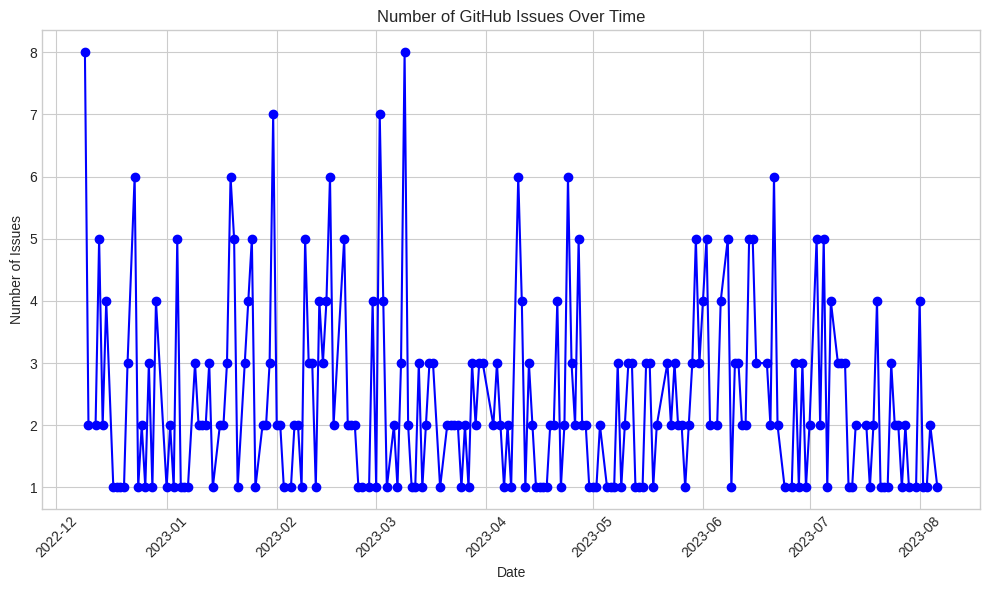

In [191]:
# Plot the number of issues over time

issues_by_date = df.groupby(df["Created At"].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(issues_by_date.index, issues_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Number of Issues")
plt.title("Number of GitHub Issues Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

This Line chart shows teh flactuation of issue number across the time, indicating a continuous flow of issues reports.

This suggests that the Rails software is actively being used, maintained and developed.

this chart also infers the typical number of reported issues over time is around 1-3 issues when there is no specific events.

the general trend of the line infers that the issues reported was significanltly larger in numbers during the first quarter of the year 2023, this may suggest a seasonal development cycle, where in colder weathers developers tend to work for prolonged hours indoors, and this increased working time could lead to more in depth testing, uncovering more issues that might have gone unnoticed during  busier times


### Granularity of Open and Closed ISsues Over TIme

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



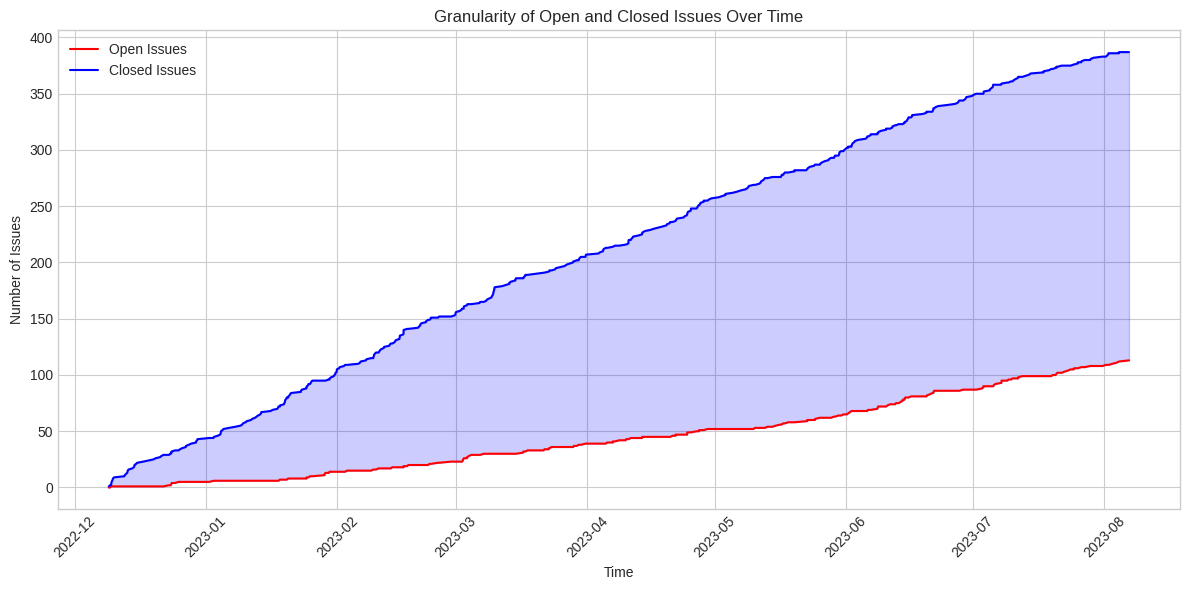

In [192]:
# Group the data by 'Created At' and 'State', and count the number of issues in each group
issue_counts = df.groupby(['Created At', 'State']).size().unstack(fill_value=0)

# Calculate cumulative sum of issue counts over time for 'Open' and 'Closed' states
issue_counts['Open Cumulative'] = issue_counts['open'].cumsum()
issue_counts['Closed Cumulative'] = issue_counts['closed'].cumsum()

# Plotting the area chart
plt.figure(figsize=(12, 6))
plt.fill_between(issue_counts.index, issue_counts['Open Cumulative'], issue_counts['Closed Cumulative'], color='blue', alpha=0.2)
plt.plot(issue_counts.index, issue_counts['Open Cumulative'], label='Open Issues', color='red')
plt.plot(issue_counts.index, issue_counts['Closed Cumulative'], label='Closed Issues', color='blue')
plt.xlabel('Time')
plt.ylabel('Number of Issues')
plt.title('Granularity of Open and Closed Issues Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart presents the evolution and granularity of issues over time. Presented by the red line, the cumulative number of issues remaining open over time, ot starts from zero and slowly increases over time. the slow incresing slope of the cumulative number of issue with state Open during the beginning of the year indicates that issues didn't remain open for a long time.
Presented by the blue line, the cumulative number of closed issues; it is gradually increasing as issues are resolved which indicates the activity of the projects owner in solving issues.
The wide shaded area between the two lines indicates the efforts of the team on actively resolving problems,bugs and tasks over time

We can infer that the developers workflow is efficient and issue resolution is effective.

## Analyzing closed issues duration over time



##### Average Duration

In [194]:

# Compute the average duration
average_duration = duration_of_closed.mean()

print("Average Duration:", average_duration)

Average Duration: 13.400516795865633


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



on average, issues remain 13 days and a half unsolved.


##### Duration evolution over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



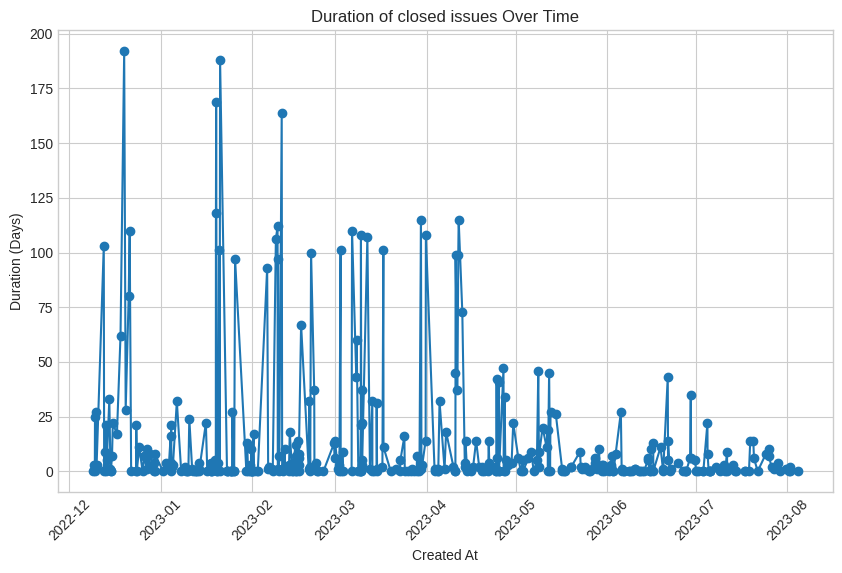

In [195]:
##### Plotting duration over time ######

closed_dates = df[df['State'] == 'closed']['Created At']
plt.figure(figsize=(10, 6))
plt.plot(closed_dates, duration_of_closed, marker='o')
plt.xlabel('Created At')
plt.ylabel('Duration (Days)')
plt.title('Duration of closed issues Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Closed issues number evolution over time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



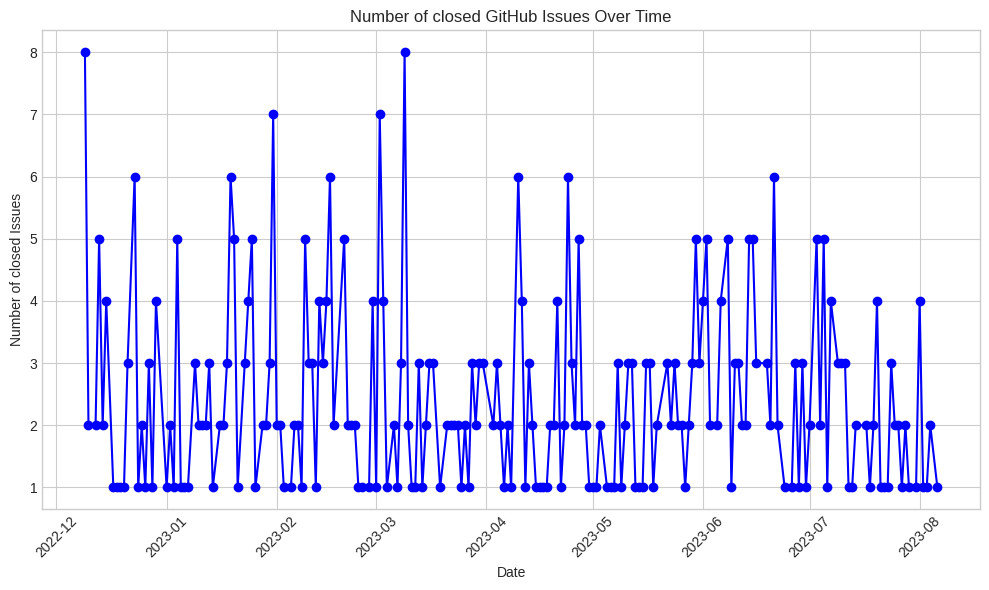

In [196]:
###### Plotting the number of issues over time ################


closed_issues_by_date = df.groupby(df[df['State'] == 'closed']["Created At"].dt.date).size()
plt.figure(figsize=(10, 6))
plt.plot(issues_by_date.index, issues_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Number of closed Issues")
plt.title("Number of closed GitHub Issues Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The number of closed issues over time and the duration of closed issues over time ehibits a pattern where each peak in the number of issues is promptly followed by a peak in the duration of an issue remaining open fefore closure. the number of issues presents a leading behavior.
we can conclude that the increased workloads causes the delay for solving sisues.

during the last 4 months, the high number of issues closed and the shorter issue durations is justified by the quick response and effective problem solving. this period represent a period of high activity and increased skills.

## Analyzing the behavior of issues duration regarding the number of created issues each month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



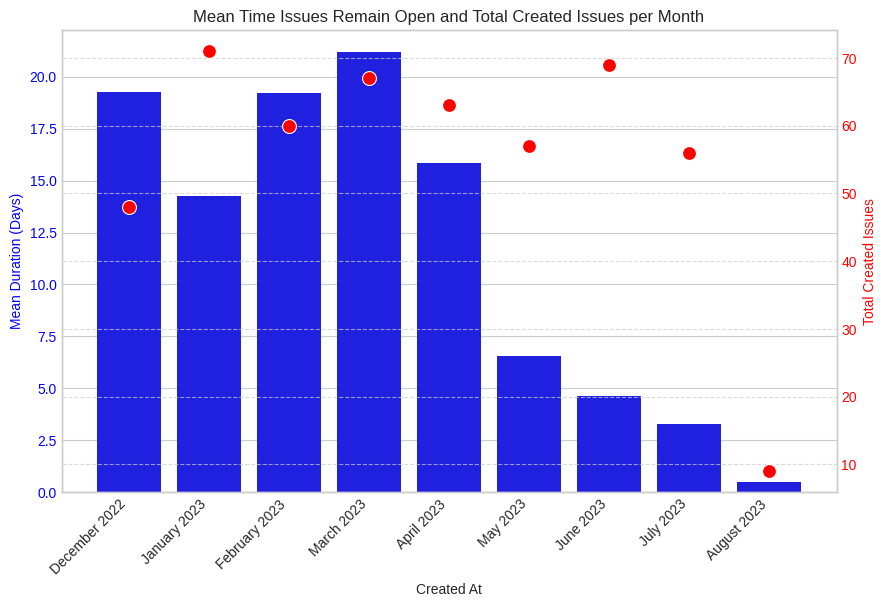

In [197]:
mean_duration_per_month = df.resample('M', on='Created At')['duration'].mean()
created_issues_per_month = df.resample('M', on='Created At').size()
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the mean duration on the first y-axis (left side)
sns.barplot(x=mean_duration_per_month.index.strftime('%B %Y'), y=mean_duration_per_month, ax=ax1, color='b')
ax1.set_ylabel('Mean Duration (Days)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create the second y-axis (right side)
ax2 = ax1.twinx()

# Plot the total number of created issues on the second y-axis (right side)
sns.scatterplot(x=created_issues_per_month.index.month_name(), y=created_issues_per_month, ax=ax2, color='r', s=100)
ax2.set_ylabel('Total Created Issues', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Customize the x-axis tick labels
xtick_labels = mean_duration_per_month.index.strftime('%B %Y')
ax1.set_xticklabels(xtick_labels, rotation=45, ha='right')
ax2.set_xticklabels(xtick_labels, rotation=45, ha='right')
# Customize the plot
plt.title('Mean Time Issues Remain Open and Total Created Issues per Month')
plt.xlabel('Months')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

the blue bars in this graph present the mean duration a created issue remains open before it's resolved in each month.
the red dots present the total number of issues created in the same months.
the mean time of an issue remaining open before resolution varied over the months with the highest value dring march 2023 ( average of 21 days ). this value can be attributed to the relatively high number of created issue during that month and to the complexity of these issues leading to challenges to resolve them promptly.
lately, issues are solved faster despite the relatively high number of created issues, this indicates the increasing efforts delivered by the development team to solve issues during the last few months, and can also be due to  many developers working on solcing the issues.
To conclude, the past few months (may, june, july and august) indicate peak develompment periods or active user interactions



# ISSUES PEAK PERIOD AND CAUSES ANALYSIS

### Monthly basis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



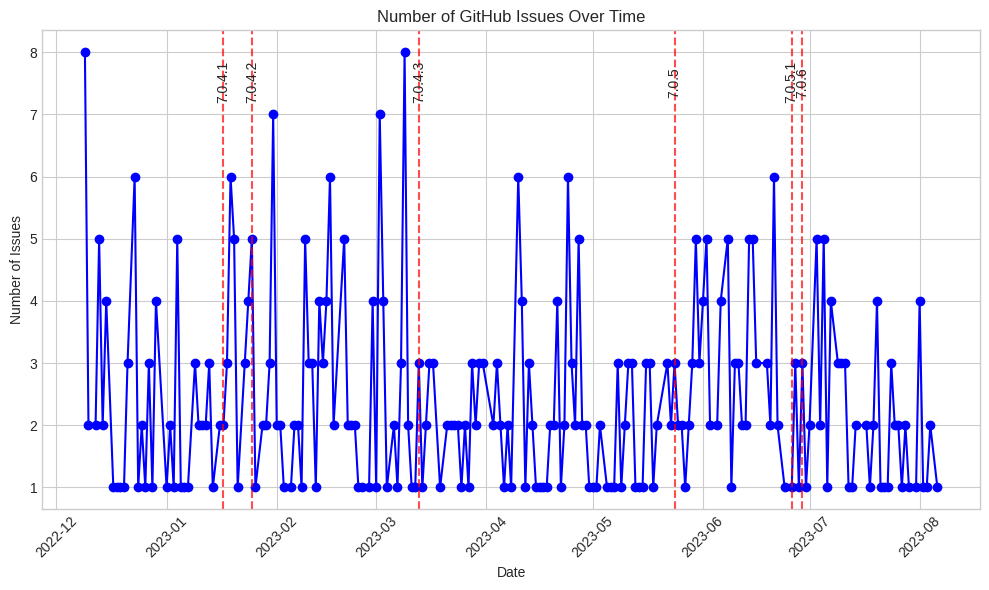

In [198]:


# Define the release dates of Rails software versions
versions_release_dates = ['2023-01-17', '2023-01-25', '2023-03-13', '2023-05-24', '2023-06-26', '2023-06-29']
versions_release_dates = pd.to_datetime(versions_release_dates)
versions = ['7.0.4.1', '7.0.4.2', '7.0.4.3', '7.0.5', '7.0.5.1', '7.0.6']

# Plot the number of issues over time with vertical lines for release dates and text labels
plt.figure(figsize=(10, 6))
plt.plot(issues_by_date.index, issues_by_date.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Number of Issues")
plt.title("Number of GitHub Issues Over Time")

# Add vertical lines for release dates and text labels
for i, release_date in enumerate(versions_release_dates):
    plt.axvline(release_date, color='r', linestyle='--', alpha=0.7)
    plt.text(release_date, plt.ylim()[1] * 0.9, versions[i], rotation=90, ha='center', va='center')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Link to : [Rails Versions](https://rubygems.org/gems/rails/versions)


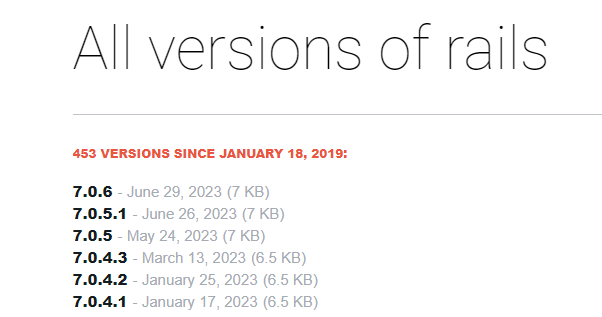

The picture above illustrates the releases of new versions throughout the studied period of time in our analysis.


Peaks in the number of created issues are observed around new version release dates. this suggests an interesting relationship between the software release schedule and the developers community engagement and feedback.

since the main branch is the branch where all changes from different contributers are merged and tested before stable releases, we observe high issue activity before release dates, which suggests that developers are working on fixing problems before delivering a stable version

As new versions are released, developers conduct stressing tests on the software to ensure the it meets exactly their needs, which can eventually lead to discovery new bugs and unexpected behavior.

 this justifies the issues number peaks around release dates  

### Weekly basis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



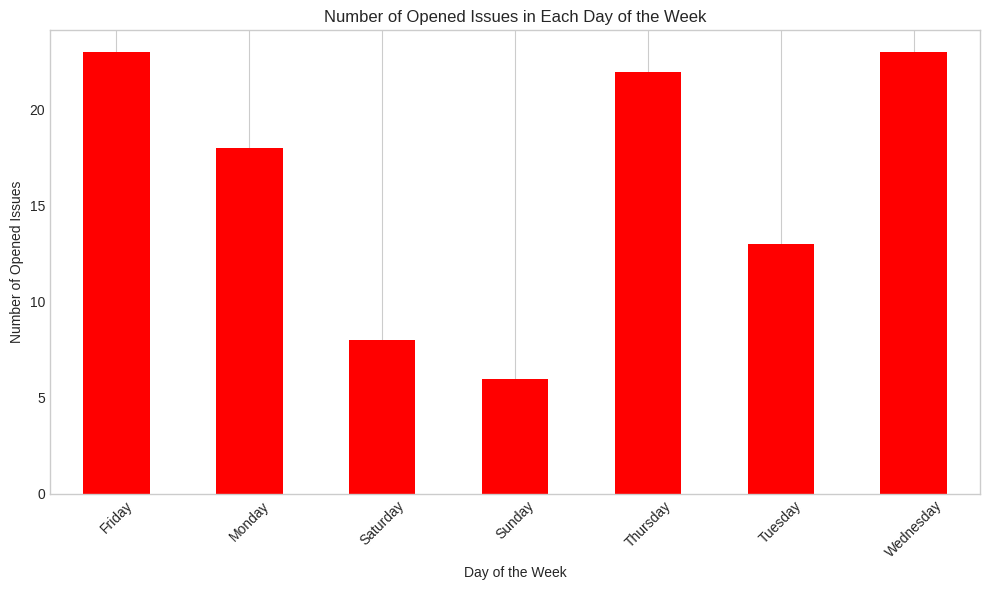

In [199]:
opened_issues_by_day = df[df['State'] == 'open'].groupby('Created At day').size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
opened_issues_by_day.plot(kind='bar', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Opened Issues')
plt.title('Number of Opened Issues in Each Day of the Week')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

According to this graph, devolopers activity decreases significantly suring weekends and it's contrarily high during the week days.

This infers that Rails software is a work-related software and people are more engaged in their professional responsibilities throughout the week which increases the the usage of software leading to a higher number of reported bugs during week days.

# MAIN CONTRIBUTERS ANALYSIS

### Top issue creators across all analysis period

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



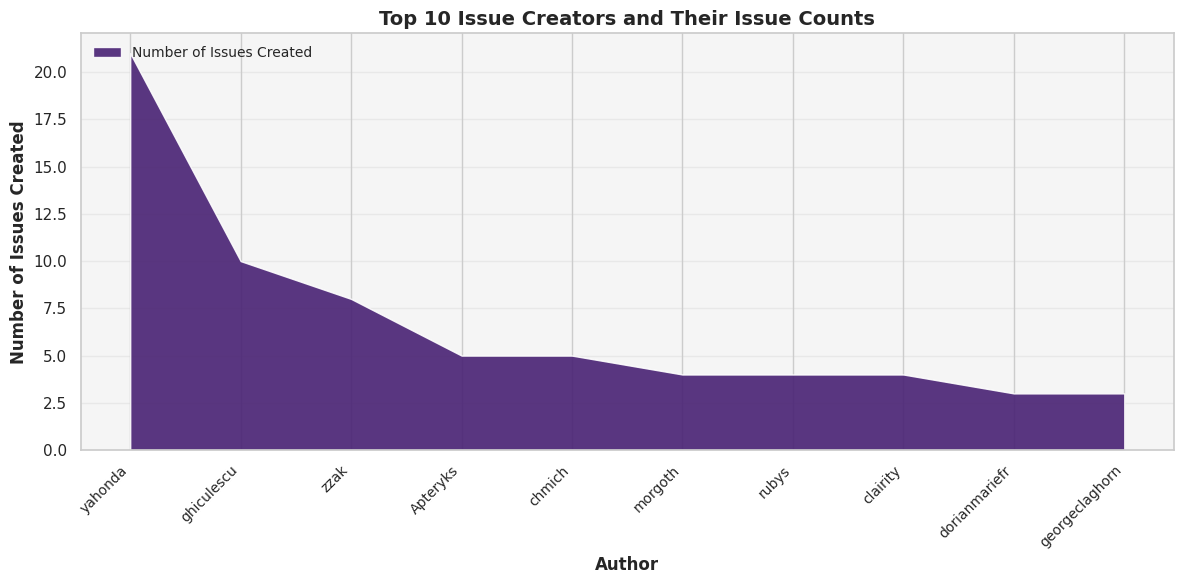

In [200]:
    # Group the data by author and count the number of issues created by each author
author_counts = df['Author'].value_counts().head(10)

    # Create a gradient background
sns.set(style='whitegrid')

    # Create the area chart
plt.figure(figsize=(12, 6))
plt.stackplot(author_counts.index, [author_counts], labels=['Number of Issues Created'], alpha=0.9, colors=sns.color_palette('viridis', len(author_counts)))

    # Add labels and title
plt.xlabel('Author', fontsize=12, fontweight='bold')
plt.ylabel('Number of Issues Created', fontsize=12, fontweight='bold')
plt.title('Top 10 Issue Creators and Their Issue Counts', fontsize=14, fontweight='bold')

    # Customize the background and gridlines
plt.gca().patch.set_facecolor('whitesmoke')
plt.grid(axis='y', linestyle='-', alpha=0.3)


    # Customize the legend
plt.legend(loc='upper left', fontsize=10)

    # Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

    # Adjust the layout
plt.tight_layout()

    # Show the chart
plt.show()

These 10 developers present the 20% more engaged developers during the studied period of time. this may suggest that these developers play a crucial rule in the quality assurance of the Rails Software with "Yahonda" being the one who possesses more expertise and domain knowledge relevant to Rails Software which make him better at understanding and identifying  potential issues. Yahonda may be a main contributer to the development of Rails software.

### Closer Look at their Activity throughout the whole period

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-201-1c2d17f04ac9>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-201-1c2d17f04ac9>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



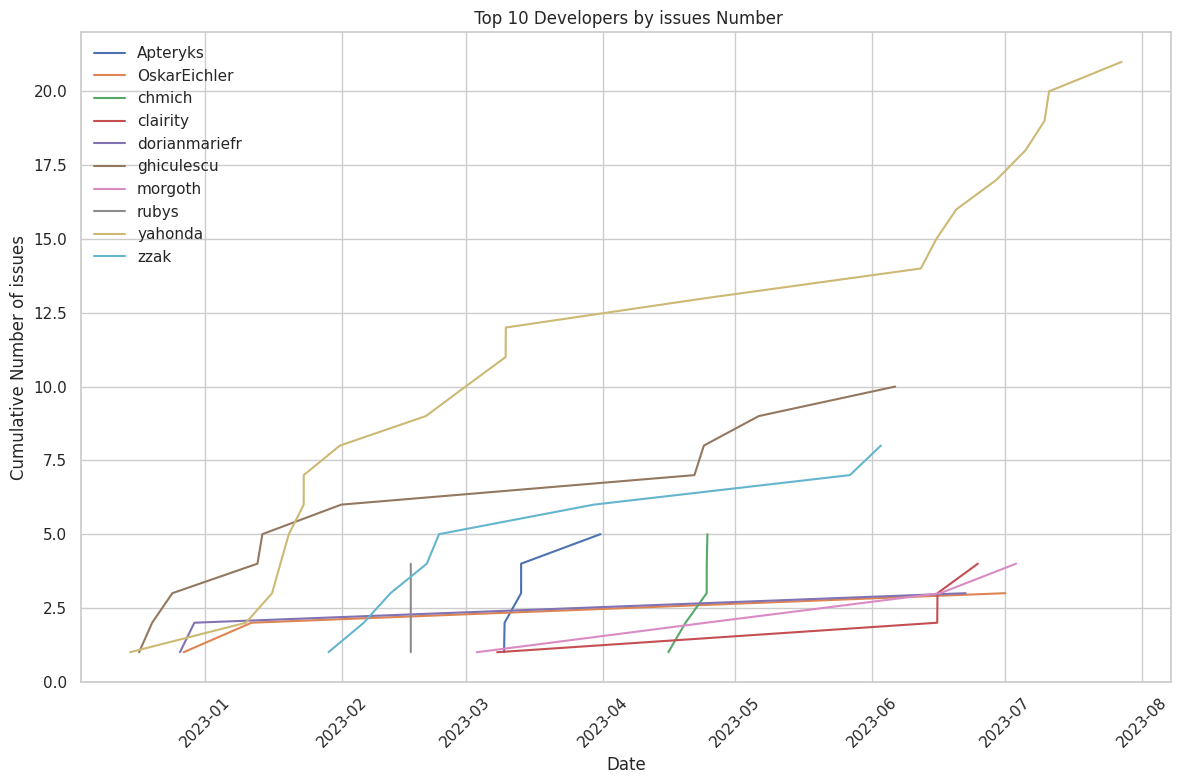

In [201]:
iss_counts = df.groupby(['Author', 'Created At']).size().reset_index(name='issuecount')

# Get the top 10 developers by issues number
top_10_developers = iss_counts.groupby('Author')['issuecount'].sum().nlargest(10).index

# Filter the data to include only the top 10 developers
filtered_data = iss_counts[iss_counts['Author'].isin(top_10_developers)]

# Create a unique numerical identifier for each author
author_id_map = {author: idx for idx, author in enumerate(filtered_data['Author'].unique())}
filtered_data['AuthorID'] = filtered_data['Author'].map(author_id_map)

# Convert the date column to datetime for better plotting
filtered_data['Created At'] = pd.to_datetime(filtered_data['Created At'])

# Group the data by author and date to get cumulative sum
grouped_data = filtered_data.groupby(['AuthorID', 'Created At'])['issuecount'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))

for author_id, author_group in grouped_data.groupby('AuthorID'):
    author_name = filtered_data[filtered_data['AuthorID'] == author_id]['Author'].iloc[0]
    plt.plot(author_group['Created At'], author_group['issuecount'].cumsum(), label=author_name)

plt.xlabel('Date')
plt.ylabel('Cumulative Number of issues')
plt.title(' Top 10 Developers by issues Number')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

this line chart illustrates the behavior of the top 10 issues creators over time:

Yahonda's continuously increasing number of  issues might suggest that he takes ownership and responsibility for the rails software project. He may be proactively identifying issues to try to address them.
the second and third top issues reporters present a contribution over a significant period of time with flat periods and sudden increases, this may suggest that they acquired more new  skills that helped them to better understand and identify more issues.

the rest are either less engaged developers or occasional users.

the Start of the summer season caused an interruption of developers with less responsibilities who may took the advantage to use their accumulated vacation time.

# LABELS PATTERNS ANALYSIS

### Top 10 issue Label across all analysis period

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



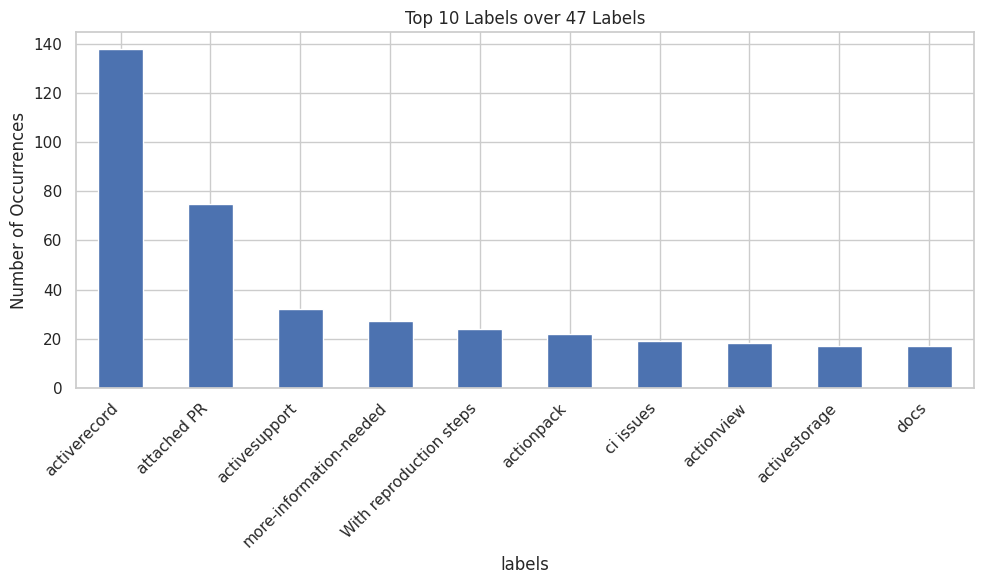

In [202]:
# Flatten the list of labels and count the occurrences of each label
all_labels = [l for label_list in df['Labels'] for l in eval(label_list)]
label_count = pd.Series(all_labels).value_counts()

# Create a bar plot for the top 10
plt.figure(figsize=(10, 6))
label_count.head(10).plot(kind='bar')
plt.title('Top 10 Labels over 47 Labels')
plt.xlabel('labels')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

the frequency of issues labels is illustrated with a bar plot.
we can infer that ActiveRecord and Attached PR are very recurrent problems and present major pain points in the development of Rails Software.

### Labels Granularity behavior each month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-249-85d185f25e69>:6: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



<Figure size 1200x1000 with 0 Axes>

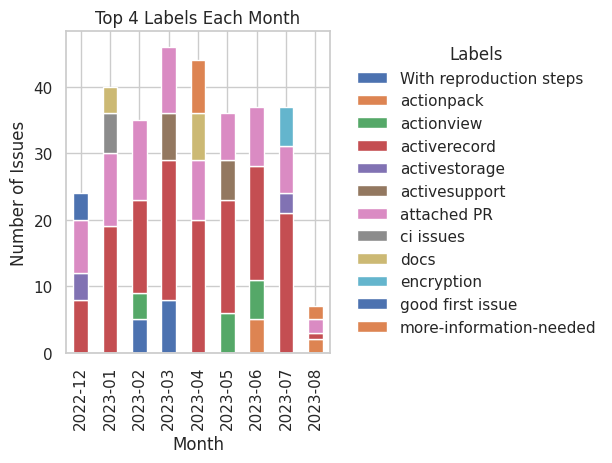

In [249]:
# Convert string representation of lists to actual lists
#  and create individual rows for each label in the whole dataframe
df['Labels'] = df['Labels'].apply(literal_eval)
df_flat_labels =  df.explode('Labels')

# Extract month and year from 'Created At' column
df_flat_labels['Month'] = df_flat_labels['Created At'].dt.to_period('M')

# Group by 'Month' and 'Labels' and count the occurrences of each label
label_counts = df_flat_labels.groupby(['Month', 'Labels']).size().reset_index(name='Count')

# Sort the labels within each month based on counts in descending order
label_counts.sort_values(['Month', 'Count'], ascending=[True, False], inplace=True)

# Get the top 4 labels for each month
top_labels_per_month = label_counts.groupby('Month').apply(lambda x: x.nlargest(4, 'Count')).reset_index(drop=True)

# Pivot the data to get the labels as columns
pivot_table = top_labels_per_month.pivot(index='Month', columns='Labels', values='Count').fillna(0)

# Plot the data
plt.figure(figsize=(12, 10))
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Number of Issues')
plt.title('Top 4 Labels Each Month')
plt.legend(title='Labels', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

supporting the results of the previous labels frequency analysis, during the studied period of time, ActiveRecord and AttachedPR are two persistant problems that require lots of efforts to solve.

their persistance may also suggest that they are part of a new feature being developed in the Rails software.

### Uncovering Label dependencies using Association Rules

 The main idea of association rules are to recognize associations within different categories in a general form of “if antecedent, then consequent”.

📣 NB: Association rules mining on this Dataset would give more insightful results about the co-occurence and interdependence between labels if the data was bigger, for now let's just do it on almost 300  instances of data to prove the utility of this technique in predicting how the likelyhood of occurence of two or more labels given one label.


this analysis help estimate what possible bugs types that can araise together to be prepared in terms of resources and developers. being prepared help allocate developers faster and therefor solving problems quicker.

In [254]:
# Create a set of unique labels
unique_labels = set(label for labels_list in df['Labels'] for label in labels_list)

# Initialize a dictionary to store the columns
label_columns = {label: [] for label in unique_labels}

# Populate the dictionary with 1 or 0 based on the label's existence in each row
for labels_list in df['Labels']:
    for label in unique_labels:
        label_columns[label].append(1 if label in labels_list else 0)

# Concatenate the original data frame with the new label columns
df_final = pd.concat([df['Issue Number'], pd.DataFrame(label_columns)], axis=1)
df_final.set_index('Issue Number', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [255]:
# working only with issues with labels
df_final = df_final.loc[(df_final != 0).any(axis=1)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



#### Trying some minimum support values (5% and 1%) and analysing frequent labels accordingly

the minimum support represents the minimum proportion of labels or occurrences required for a label  to be considered "frequent."

In [256]:
# Frequent items with their corresponding support values with minimum support threshold of 5%
f_issues = apriori(df_final, min_support = 0.05, use_colnames = True)
f_issues

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.442308,(activerecord)
1,0.240385,(attached PR)
2,0.057692,(actionview)
3,0.054487,(activestorage)
4,0.054487,(docs)
5,0.060897,(ci issues)
6,0.102564,(activesupport)
7,0.086538,(more-information-needed)
8,0.070513,(actionpack)
9,0.076923,(With reproduction steps)


this table shows that ActiveRecord and Attached PR are the most frequent labels with respective probability of occurence 44% and 24%. this supports the previous labels frequency analysis

In [257]:
# Apriori rules with minimum support threshold of 5%
apriori_rules = association_rules(f_issues, metric = 'lift', min_threshold = 0.05)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(With reproduction steps),(activerecord),0.076923,0.442308,0.051282,0.666667,1.507246,0.017258,1.673077,0.364583
1,(attached PR),(activerecord),0.240385,0.442308,0.105769,0.440000,0.994783,-0.000555,0.995879,-0.006857
0,(activerecord),(attached PR),0.442308,0.240385,0.105769,0.239130,0.994783,-0.000555,0.998352,-0.009317
2,(activerecord),(With reproduction steps),0.442308,0.076923,0.051282,0.115942,1.507246,0.017258,1.044136,0.603448


labels with high probability ofoccurence represent the most common label combinations in issues such like activerecord and attached PR
these two labels specifically present strong interdependence since the likelyhodd of the occuring of one label given the other label is high


Regarding the size of the dataset, a 5% minimum support is 5% is a very constraining threshold and results in a small number of frequent labls combination, let's try with 1% for more results




In [258]:
# frquent labels  with minimum support threshold of 1%
f_issues = apriori(df_final, min_support = 0.01, use_colnames = True)
f_issues

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.442308,(activerecord)
1,0.012821,(pinned)
2,0.048077,(railties)
3,0.240385,(attached PR)
4,0.032051,(encryption)
5,0.057692,(actionview)
6,0.041667,(good first issue)
7,0.054487,(activestorage)
8,0.016026,(PostgreSQL)
9,0.054487,(docs)


In [259]:
# apriori rules with minimum support threshold of 5%
apriori_rules = association_rules(f_issues, metric = 'lift', min_threshold = 0.01)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(PostgreSQL),(activerecord),0.016026,0.442308,0.016026,1.000000,2.260870,0.008937,inf,0.566775
3,(encryption),(activerecord),0.032051,0.442308,0.028846,0.900000,2.034783,0.014670,5.576923,0.525386
24,(good first issue),(docs),0.041667,0.054487,0.032051,0.769231,14.117647,0.029781,4.097222,0.969565
13,(With reproduction steps),(activerecord),0.076923,0.442308,0.051282,0.666667,1.507246,0.017258,1.673077,0.364583
25,(docs),(good first issue),0.054487,0.041667,0.032051,0.588235,14.117647,0.029781,2.327381,0.982712
9,(stale),(activerecord),0.035256,0.442308,0.016026,0.454545,1.027668,0.000431,1.022436,0.027907
1,(attached PR),(activerecord),0.240385,0.442308,0.105769,0.440000,0.994783,-0.000555,0.995879,-0.006857
7,(ci issues),(activerecord),0.060897,0.442308,0.025641,0.421053,0.951945,-0.001294,0.963287,-0.051012
16,(actionview),(attached PR),0.057692,0.240385,0.019231,0.333333,1.386667,0.005362,1.139423,0.295918
14,(railties),(attached PR),0.048077,0.240385,0.016026,0.333333,1.386667,0.004469,1.139423,0.292929


As we can see increasing the minimum suport increased the number of frequent labels and consequently the number of most frequent combinations


### Exploring relationships between issues labels and how they relate to each other using parallel category plot with 1% minimum support threshold

In [260]:
f_issues = apriori(df_final, min_support = 0.01, use_colnames = True)
apriori_rules = association_rules(f_issues, metric = 'lift', min_threshold = 0.01)
apriori_rules.sort_values('confidence', ascending = False, inplace = True)
apriori_vis = apriori_rules

apriori_vis['uni'] = np.nan
apriori_vis['ant'] = np.nan
apriori_vis['con'] = np.nan
apriori_vis['tot'] = 313 # number of issues with labels


labels = df['Labels'].to_list()
labels=[sub_list for sub_list in labels if sub_list]
len(labels)
def label():
    for l in labels:
        yield l
def antec(x):
    cnt = 0
    for l in label():
        l = set(l)
        if x.intersection(l) == x:
            cnt = cnt + 1
    return cnt
vis = apriori_vis.values.tolist()

rules_dict = []
for i in vis:
    i[10] = antec(i[0])
    i[11] = antec(i[1])
    i[9] = antec(i[0].union(i[1]))
    diction = {
        'lhs': tuple(i[0]),
        'rhs': tuple(i[1]),
        'count_full': i[9],
        'count_lhs': i[10],
        'count_rhs': i[11],
        'num_transactions': i[12]
    }
    rules_dict.append(diction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [261]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

PyARMViz.generate_parallel_category_plot(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



in parallel category plot, the left hand side axe presents the initial label of an issue and the right hand side axe presents the consequent label given the initial label
we have only two axes because most of combinations are composed of only two label categories.

the blue lines represent the flowliness between labels categories which means the movement or transition from the first label to the second label.

the observation of this plot suggests that activeRecord issues will most likely be associated to ci issues, stale, postgreSQL and more information needed.

same as for issues initially labeled as attached PR, they are likely to be also labeled active support, action pack, action view and railties.


the width of the blue line( the flow)  represent an indication of the frequency of occurence of the combination of the two labels. If the combination occures many times in the dataset, the flow will appear wider.


As i previously meantioned, this dataset may not be representative for the combinations of labels for two reasons( small dataset and tight period of time). the Analysis would be more meaningful on larger data and representative analysis period.

# My question
**How can we identify hidden patterns of collaboration and knowledge sharing among developers by analyzing the co-occurrence of labels on closed issues ❓**

### Motivation

There are many issues with multiple distinct labels, which eventually indicates that it's a multifaceted issue that may resuire collaboration of developers form different backgrounds to be solved.

This is what fueled my interest to study the hidden patterns of developers collaboration from labels co-occurence.

### Steps to Answer:

1) **Filtering Closed Issues:**  filtering the dataset to include only closed issues, as we are interested in analyzing the co-occurrence of labels on issues that have been resolved.


2) **Co-Occurrence Analysis:** we start by Calculating the frequency of each label combination (co-occurrence) across all closed issues that we just filtered.

3) **Network Visualization:** Visualizing the label combinations as a network graph, where each label is a node, and co-occurrences are represented as edges between nodes. This network graph can reveal clusters of labels that frequently co-occur, indicating areas of collaboration and knowledge sharing among developers.

4) Community Detection: Apply community detection algorithms to identify subgroups of labels that form cohesive clusters in the network. Each community represents a set of labels that often work together on related issues.

### Implementation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



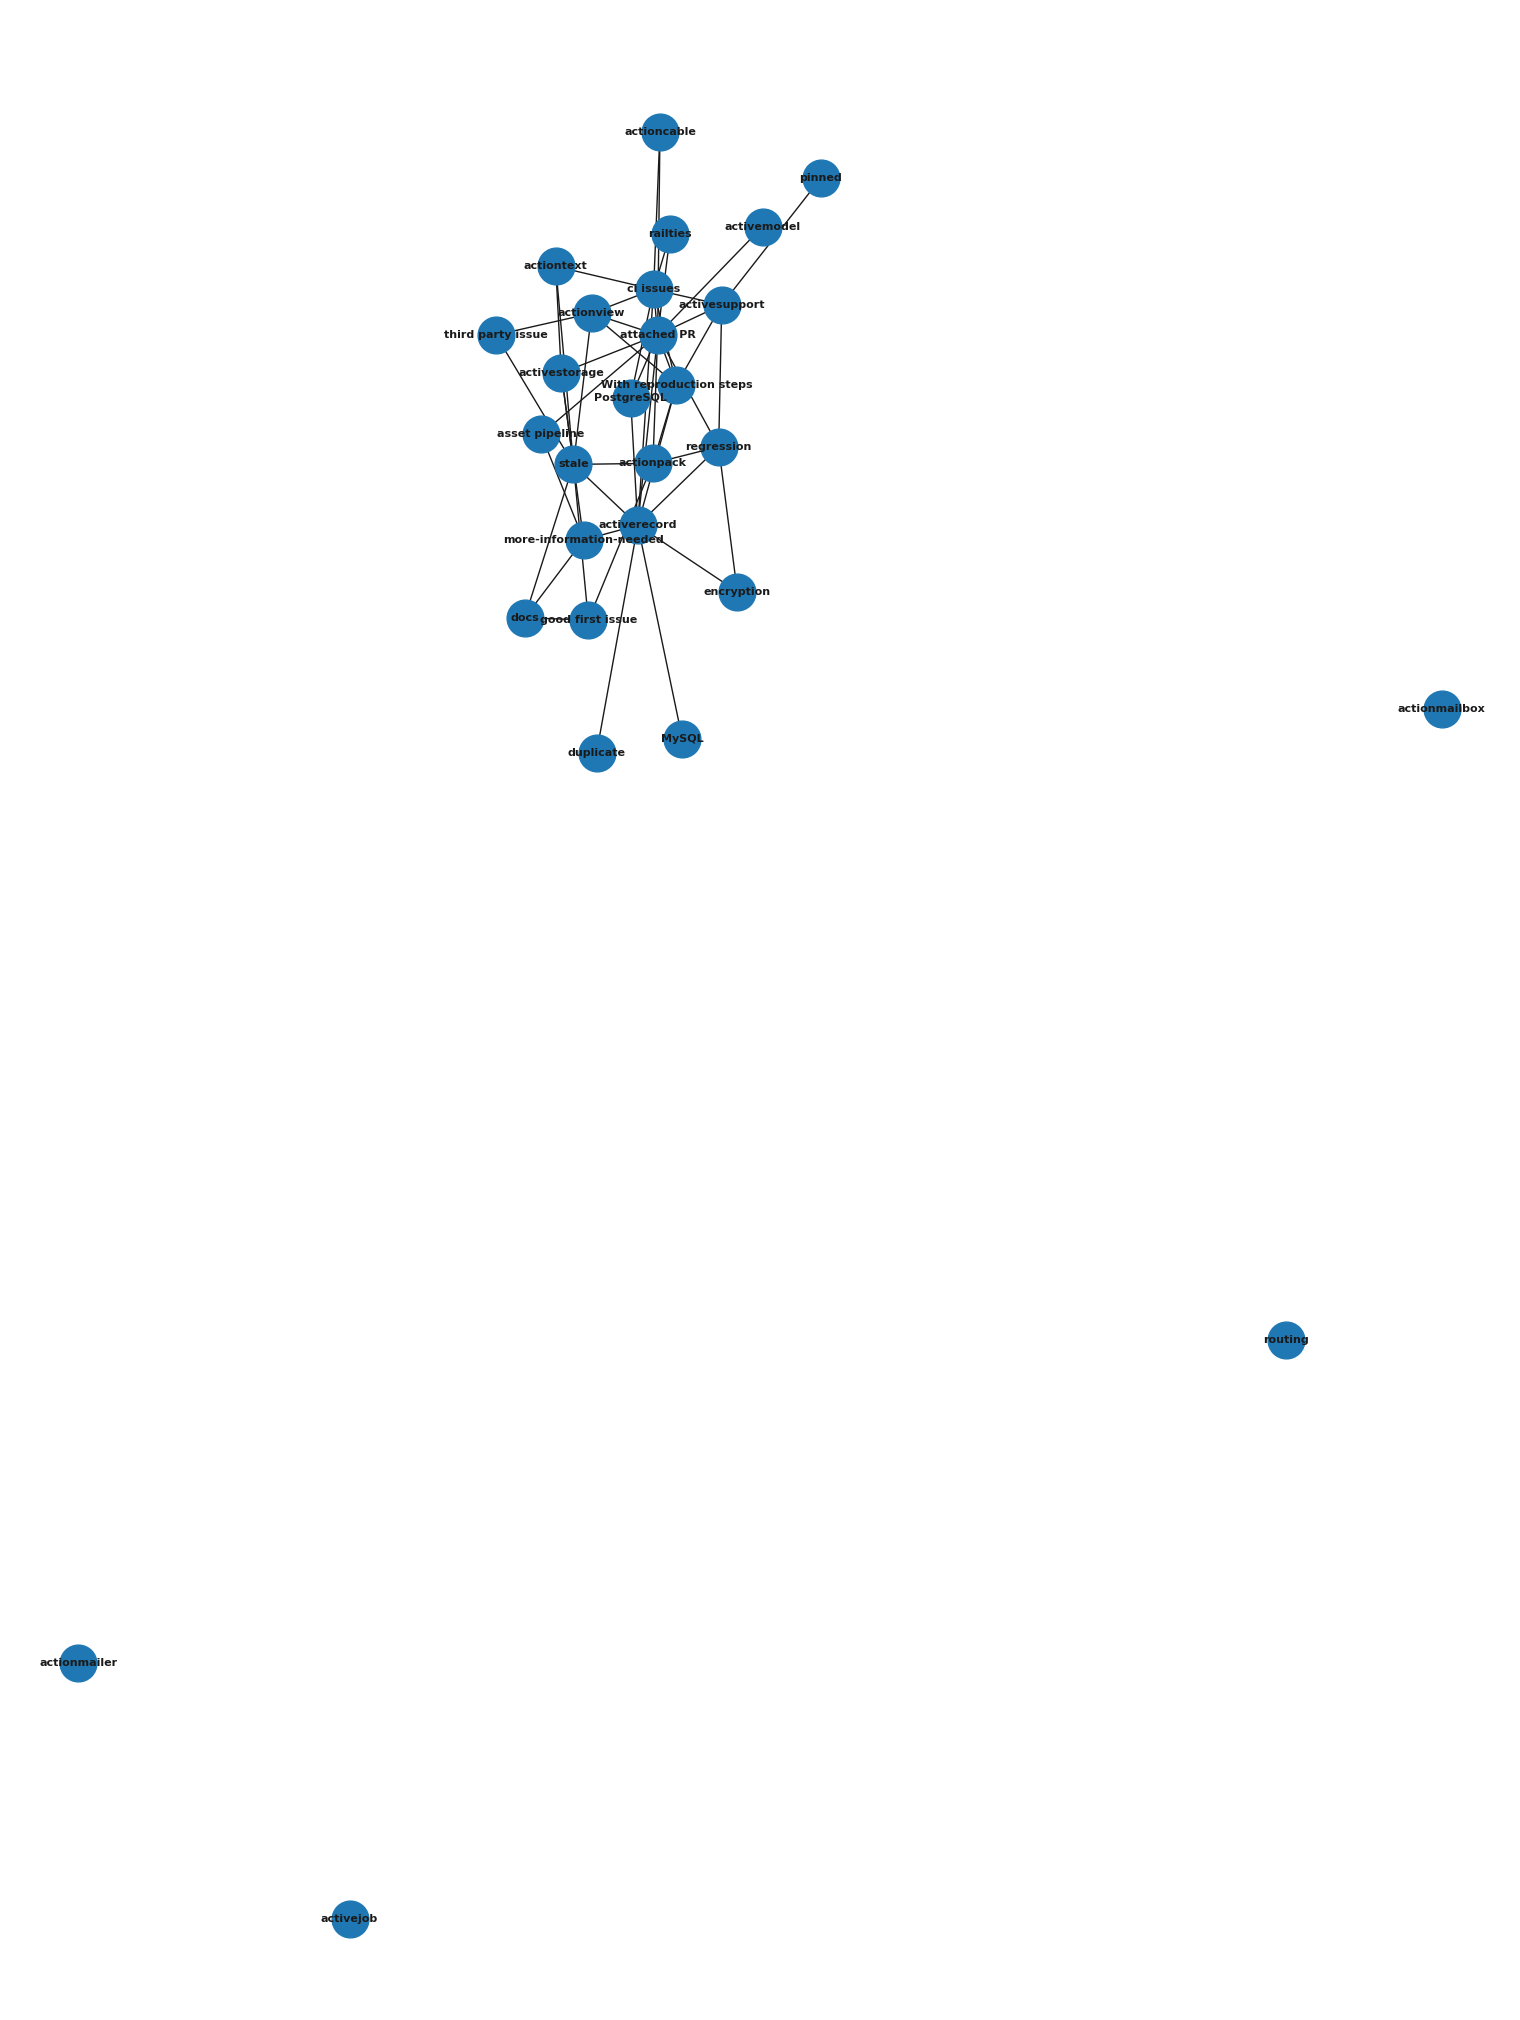

In [262]:
# df['Labels'] = df['Labels'].apply(ast.literal_eval)
closed_issues_df = df[df['State'] == 'closed']
# Co-occurence analysis of labels combinations
label_combinations_count = closed_issues_df['Labels'].value_counts()
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for labels, count in label_combinations_count.items():
    G.add_nodes_from(labels)
    for label in labels:
        for other_label in labels:
            if label != other_label:
                G.add_edge(label, other_label, weight=count)

# Draw the graph
plt.figure(figsize=(15, 20))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, font_size=8, font_weight='bold')
labels = nx.get_edge_attributes(G,name=None)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



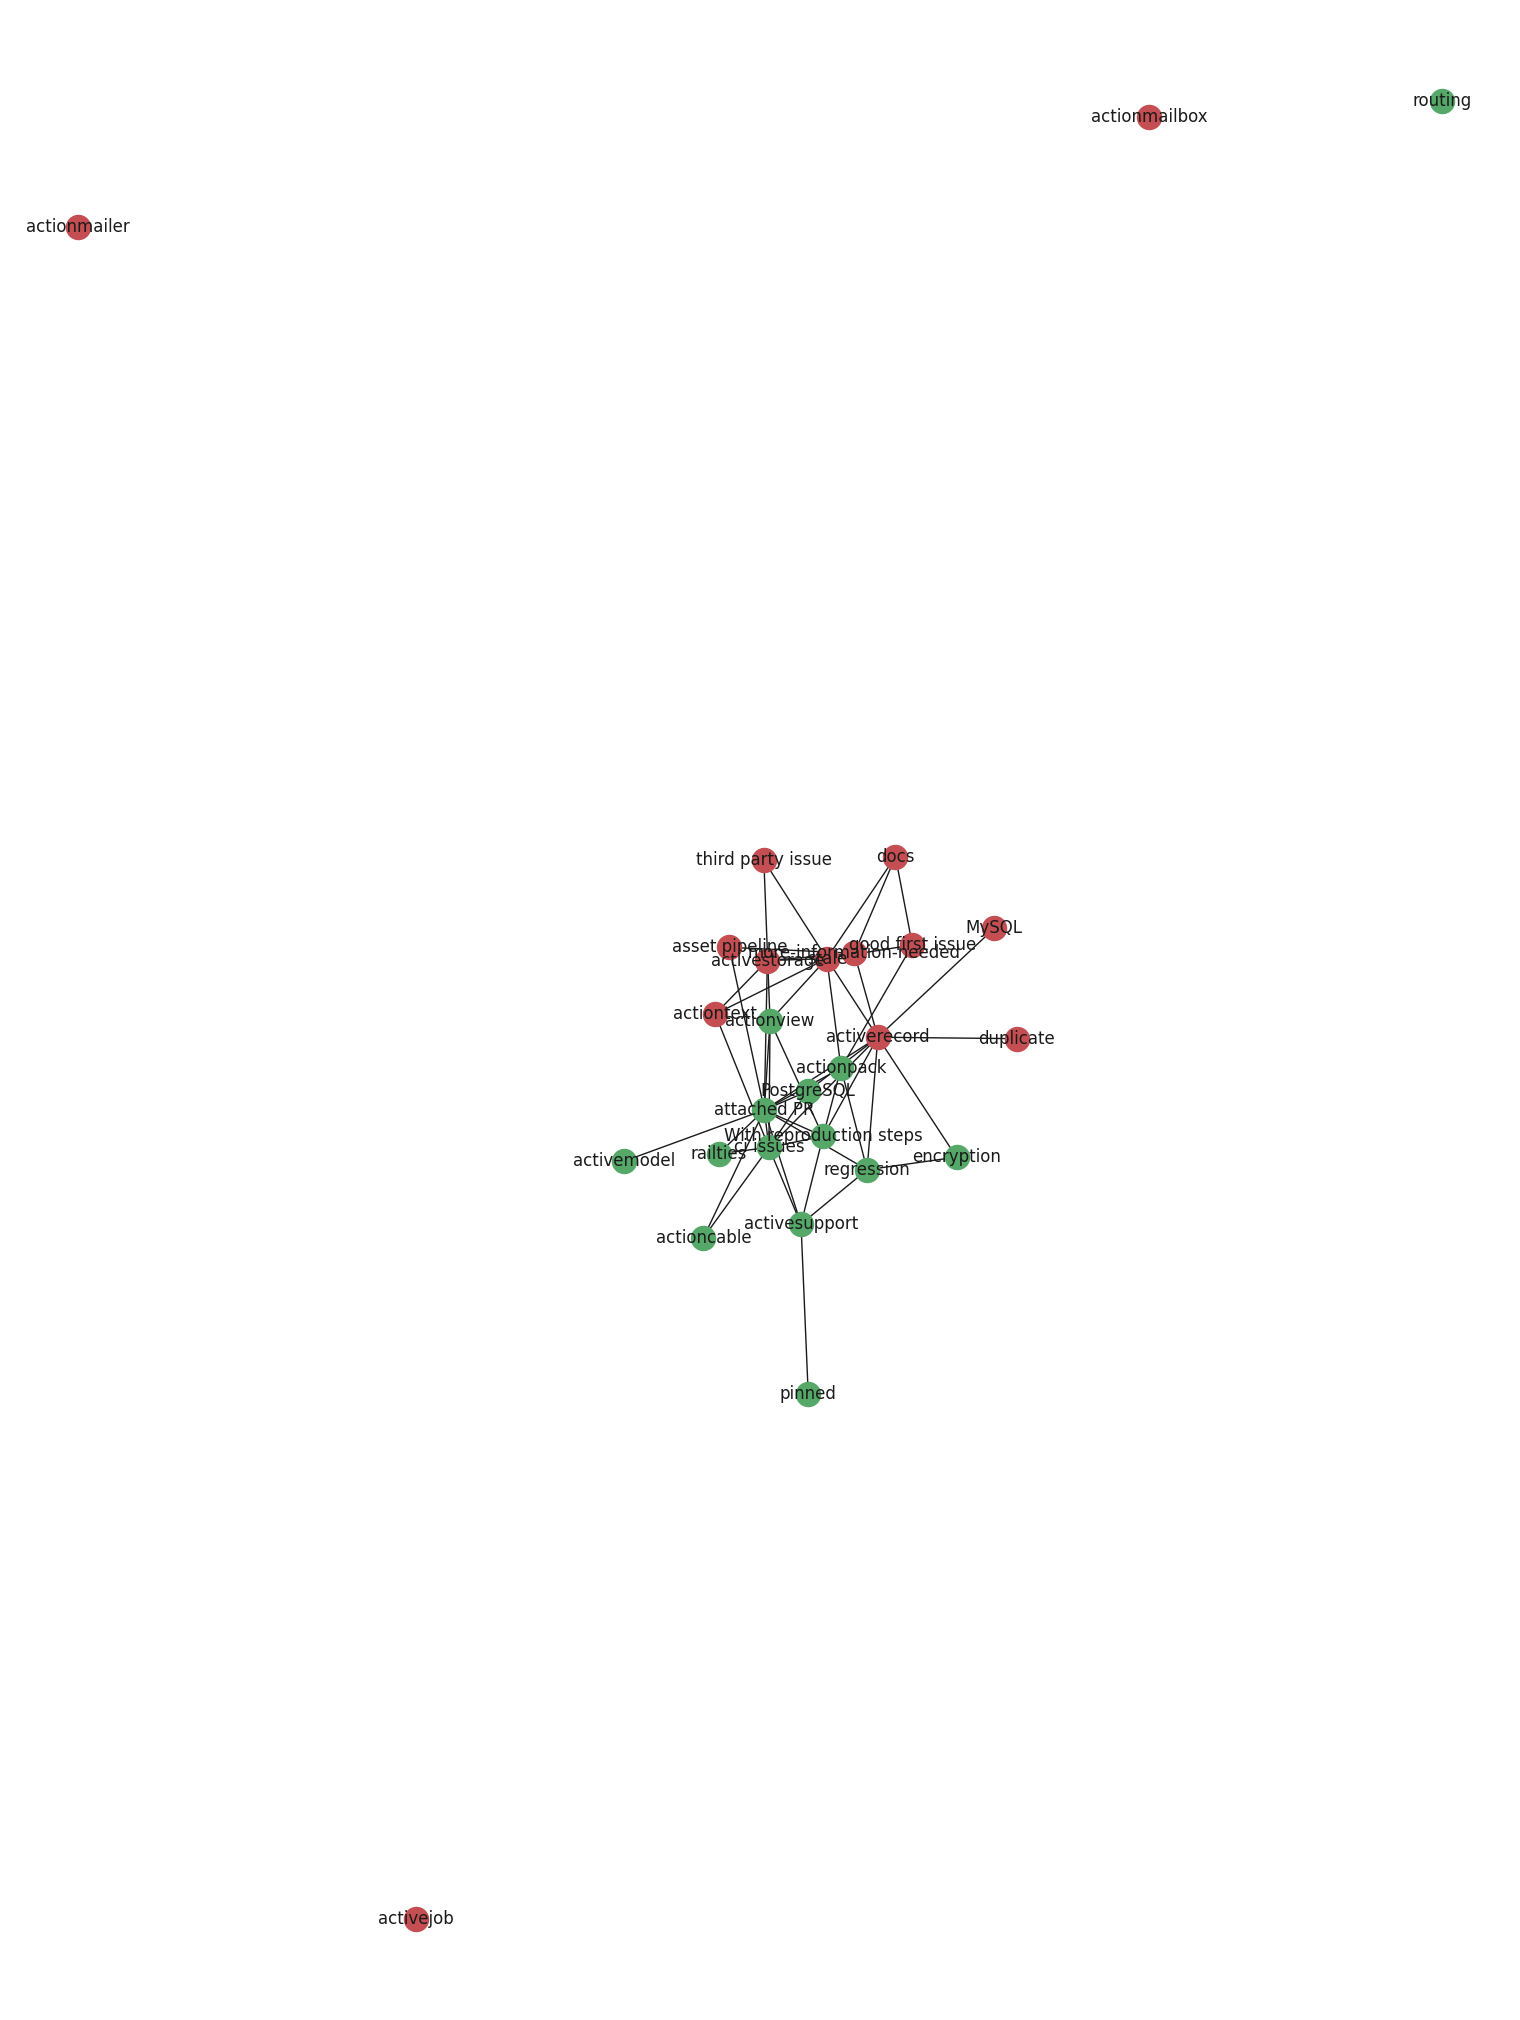

In [265]:
colors = 'rgb'
plt.figure(figsize=(15, 20))
# Kernighan-Lin algorithm for community detection
communities = community.kernighan_lin_bisection(G, max_iter=100)
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, node_size =100, node_color='w', node_shape = '.')

for i in range(len(communities)):
    nx.draw_networkx_nodes(G, pos, nodelist=communities[i], node_color=colors[i])

This Analysis aim to identify hidden patterns of collaborations between developers to solve issue. for example, when specific labels co-occured on issues that are already closed, this suggests that developers from different backgrounds and different expertise in different areas formed communities and collaborated together to solve complex issues with multiple labels.

from this graph we observe that the developers network is formed of two communities ( displayed in distinct colors, red and green).

The fact that the graph is partitioned into two communities suggests that there are two main clusters of developers who tend to collaborate more with each other. This indicates that  Developers within the same community may share knowledge, skills, and experiences related to particular aspects of the project to be able to resolve an issue with multiple categories and multiple aspects.


there are also  connections between the two communities whichh indicate instances where developers from different communities collaborate on certain issues


with this analysis we could uncover hidden patterns of team work and coordinations between developers.

# Conclusion

"Rails Software" is a powerful and widely used tool loved by developers. But like any complex project, it's facing some challenges.

the major challenge is related to the "ActiveRecord" component. The frequent occurrences of the "ActiveRecord" label on the issue tracker infers that this issue is  persistent and is causing many troubles. Developers are constantly opening and closing issues related to this critical component.


On the other hand, the "ActiveSupport" issues seemed to have been successfully tackled. this label no longer appeared since june which indicates that this functionality is fully implemented and all its issues are resolved.



The software's release schedule seems to have a significant impact on issue activity. Peaks in the number of created issues were observed around new version release dates. This suggested that rails community is actively testing and giving feedback on releases.





 The number of reported issues was significantly higher during the first quarter of the year 2023. This suggests the presence of seasonal development cycles that can be attributed to colder weather that leads developers to work for more prolonged  hours indoors. This increased working time possibly resulted in more in-depth testing, uncovering a higher number of issues that may went unnoticed previously.



The number of closed issues outnumberes the open ones. This proves the  active efforts of the developement team to solve software problems,bugs and tasks. This also showcases that Rails software is actively being used, maintained, and developed.



  High numbers of closed issues and shorter issue durations in the last few months indicates a period of intense development activity and efficient issue resolution. This may be attributed to the increased skillset of developers and their ability to resolve issues faster.










The analysis of developer activity throughout the week unveiled an interesting trend. Weekdays saw significantly higher engagement, indicating that the Rails software was primarily used for work-related tasks, leading to more bug reports during weekdays.





Among all developers, "Yahonda" is noticedto be the most prominent contributor, this suggests that he has more expertise and domain knowledge relevant to Rails Software  development.



we can conclude that  that "ActiveRecord" and "Attached PR" are  major pain points in the development process. Their persistence might suggest that they were part of new features being developed.



Hidden patterns of teamwork and coordination between developers could be uncovered from the co-occurence of labels categories. It's inferred that there are two communities  where developers in each community collaborate to solve multi labeled issues



Rails Software  faced many challenges and bugs, but with a team of dedicated developers, led by the exceptional contributions of "Yahonda," they tackled issues efficiently. The release schedule brought periods of intense engagement, yet, the project continued to evolve and grow.


In [282]:
# Convert this notebook to HTML filee
%%shell
jupyter nbconvert --to html /ETS_ADMISSION_PROGRAMMING_TEST.ipynb

[NbConvertApp] Converting notebook /ETS_ADMISSION_PROGRAMMING_TEST.ipynb to html
[NbConvertApp] Writing 3229333 bytes to /ETS_ADMISSION_PROGRAMMING_TEST.html
